In [1]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
import torch
from diffusers.utils import load_image
import os

d:\software\anaconda\install\envs\diffusion\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
controlnet_model_path = "lllyasviel/control_v11f1p_sd15_depth"
depth_map = load_image("https://huggingface.co/datasets/YiYiXu/testing-images/resolve/main/depth.png")
generator = torch.manual_seed(33)

In [5]:
controlnet = ControlNetModel.from_pretrained(controlnet_model_path, torch_dtype=torch.float32)

pipeline = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float32)
pipeline.to("cuda")

Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00,  9.04it/s]


StableDiffusionControlNetPipeline {
  "_class_name": "StableDiffusionControlNetPipeline",
  "_diffusers_version": "0.28.0.dev0",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "controlnet": [
    "diffusers",
    "ControlNetModel"
  ],
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

100%|██████████| 30/30 [03:43<00:00,  7.44s/it]


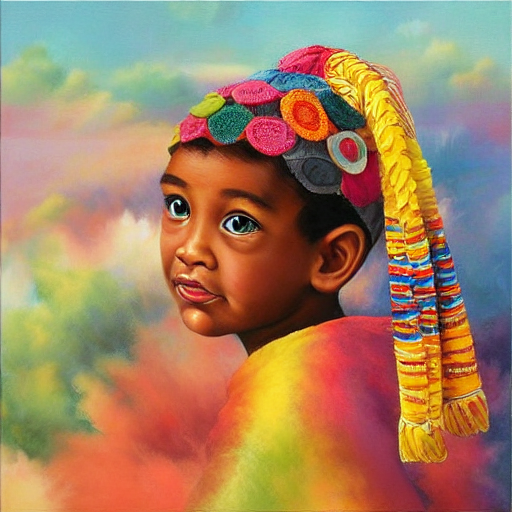

In [6]:
image = pipeline(
    prompt="best quality, high quality",
    image=depth_map,
    negative_prompt="monochrome, lowres, bad anatomy, worst quality, low quality",
    num_inference_steps=30,
    # generator=generator,
).images[0]
image

In [9]:
controlnet = ControlNetModel.from_pretrained(controlnet_model_path, torch_dtype=torch.float16)

pipeline = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16)
pipeline.to("cuda")
generator = torch.manual_seed(33)

Loading pipeline components...: 100%|██████████| 7/7 [00:04<00:00,  1.46it/s]


100%|██████████| 30/30 [05:27<00:00, 10.90s/it]


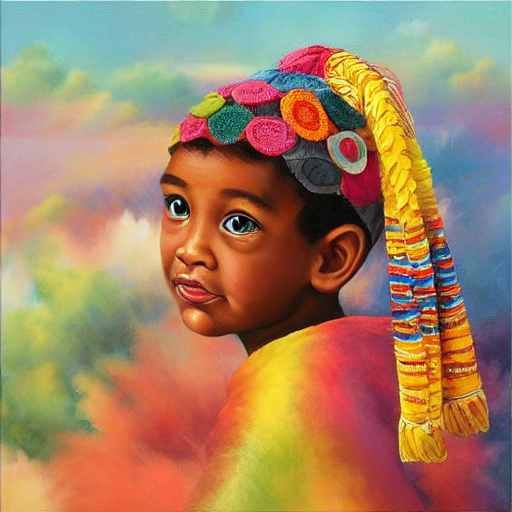

In [10]:
image = pipeline(
    prompt="best quality, high quality",
    image=depth_map,
    negative_prompt="monochrome, lowres, bad anatomy, worst quality, low quality",
    num_inference_steps=30,
    # generator=generator,
).images[0]
image